# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [4]:
data = pd.read_csv("train.csv")
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [6]:
df = pd.DataFrame(data=data, columns=['GrLivArea', 'YearBuilt','SalePrice'])
print(df)

      GrLivArea  YearBuilt  SalePrice
0          1710       2003     208500
1          1262       1976     181500
2          1786       2001     223500
3          1717       1915     140000
4          2198       2000     250000
...         ...        ...        ...
1455       1647       1999     175000
1456       2073       1978     210000
1457       2340       1941     266500
1458       1078       1950     142125
1459       1256       1965     147500

[1460 rows x 3 columns]


# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

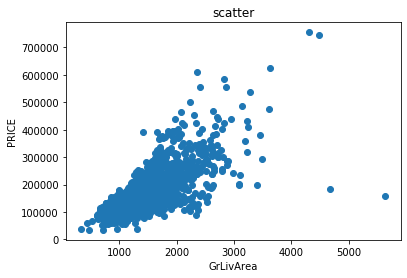

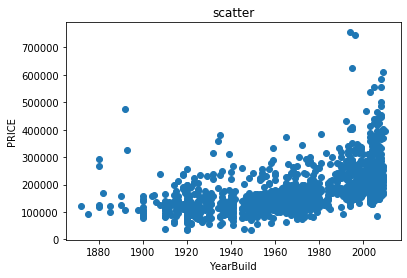

In [90]:
# 散布図
plt.title("scatter")
plt.xlabel("GrLivArea")
plt.ylabel("PRICE")
x = df["GrLivArea"]
y = df["SalePrice"]
x2 = df["YearBuilt"]
y2 = df["SalePrice"]

plt.scatter(x, y, label="GrLivArea")

plt.show()


plt.title("scatter")
plt.xlabel("YearBuild")
plt.ylabel("PRICE")

plt.scatter(x2, y2, label="YearBuilt")

plt.show()

In [29]:
# 相関係数とヒートマップ 
corr_mat = df.corr(method='pearson')
print(corr_mat)

           GrLivArea  YearBuilt  SalePrice
GrLivArea   1.000000   0.199010   0.708624
YearBuilt   0.199010   1.000000   0.522897
SalePrice   0.708624   0.522897   1.000000


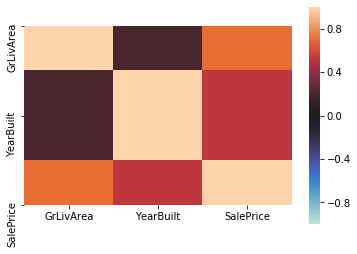

In [31]:
sns.heatmap(corr_mat, square=True, vmax=1, vmin=-1, center=0) 

plt.show()  

In [78]:
# 線形回帰

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


変換後の歪度は : 0.12133506220520406
変換後の尖度は : 0.8095319958036296


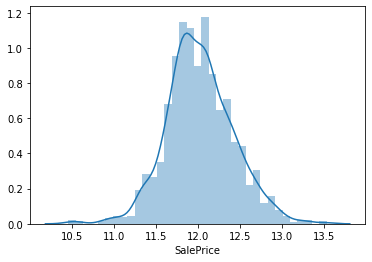

In [140]:
#　SalePriceを正規化
df_log = np.log(df['SalePrice'])
#print(df_log)
sns.distplot(df_log)

# 歪度
skew = df_log.skew()
# 尖度
kurtosis = df_log.kurtosis()
print("変換後の歪度は : {}".format(skew))
print("変換後の尖度は : {}".format(kurtosis))


In [352]:
# ndarray化

X = df.values
y = df_log.values
X = np.delete(X, 2, axis=1)

# データ分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, train_size=0.75)
print(x_train, x_test, y_train, y_test)

[[2184 2008]
 [2046 2003]
 [ 969 1975]
 ...
 [2601 1921]
 [ 848 2004]
 [ 729 1935]] [[1761 2007]
 [1501 1999]
 [1868 1984]
 [ 954 1938]
 [1229 1956]
 [1122 1948]
 [1271 1948]
 [1502 2009]
 [3238 1995]
 [1258 2006]
 [1365 1971]
 [1426 1918]
 [1516 1964]
 [1314 2006]
 [1553 2005]
 [1266 2005]
 [2127 1991]
 [1848 1923]
 [1229 1980]
 [1050 1956]
 [1040 1950]
 [1297 1954]
 [1317 1920]
 [1032 1978]
 [1959 2004]
 [1040 1962]
 [1437 1976]
 [1277 1970]
 [1539 1904]
 [1131 1937]
 [1054 1963]
 [1258 1939]
 [1595 1940]
 [1148 1952]
 [ 754 1935]
 [ 780 1972]
 [1034 1976]
 [1922 2003]
 [2240 1979]
 [ 838 1918]
 [ 866 1945]
 [2198 2000]
 [1394 1963]
 [1958 1946]
 [2112 1969]
 [1456 1948]
 [ 892 1967]
 [1268 1949]
 [1350 1964]
 [ 841 1950]
 [1509 2002]
 [1640 1954]
 [1250 1910]
 [1274 2005]
 [1188 1959]
 [1472 1980]
 [1560 2005]
 [1629 2003]
 [1437 1956]
 [1733 2003]
 [1419 2007]
 [1725 1979]
 [1501 1993]
 [3279 2003]
 [1541 2005]
 [ 804 1940]
 [2201 1966]
 [1733 1955]
 [ 886 1938]
 [ 848 2003]
 [1949

In [353]:
# 標準化

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
print(x_train_std)
print(x_test_std)

[[ 1.28358377  1.23837446]
 [ 1.02192615  1.07217109]
 [-1.0201409   0.14143224]
 ...
 [ 2.07424482 -1.65356413]
 [-1.24956533  1.10541176]
 [-1.47519762 -1.1881947 ]]
[[ 4.81546290e-01  1.20513378e+00]
 [-1.14318284e-02  9.39208397e-01]
 [ 6.84425746e-01  4.40598296e-01]
 [-1.04858195e+00 -1.08847268e+00]
 [-5.27162782e-01 -4.90140560e-01]
 [-7.30042239e-01 -7.56065947e-01]
 [-4.47527856e-01 -7.56065947e-01]
 [-9.53575868e-03  1.27161513e+00]
 [ 3.28204121e+00  8.06245703e-01]
 [-4.72176762e-01  1.17189311e+00]
 [-2.69297305e-01  8.46954144e-03]
 [-1.53637055e-01 -1.75328615e+00]
 [ 1.70092169e-02 -2.24215172e-01]
 [-3.65996859e-01  1.17189311e+00]
 [ 8.71637952e-02  1.13865244e+00]
 [-4.57008204e-01  1.13865244e+00]
 [ 1.17550779e+00  6.73283010e-01]
 [ 6.46504352e-01 -1.58708278e+00]
 [-5.27162782e-01  3.07635602e-01]
 [-8.66559256e-01 -4.90140560e-01]
 [-8.85519953e-01 -6.89584600e-01]
 [-3.98230044e-01 -5.56621906e-01]
 [-3.60308650e-01 -1.68680480e+00]
 [-9.00688510e-01  2.411542

In [394]:
# 線形回帰

# アルゴリズムに線形回帰(Linear Regression)を採用
mod = LinearRegression()

# fit関数で学習開始
mod.fit(x_train, y_train)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{}'.format(mod.coef_))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {}'.format(mod.intercept_))

a = mod.coef_
b = mod.intercept_

傾き：[0.00044534 0.00621559]
y切片: -0.9063896811601069


In [355]:
#trainとtestでそれぞれ予測してみる
y_train_pred = mod.predict(x_train)
y_test_pred = mod.predict(x_test)

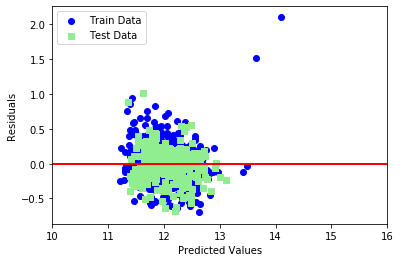

In [417]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'b', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10,16])

plt.show()


In [357]:
# 最小二乗誤差で評価
mse = mean_squared_error(y_test, y_test_pred)
mse

0.04639927231461719

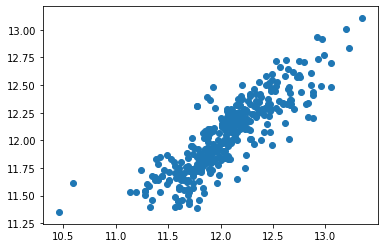

In [415]:
plt.scatter(y_test,y_test_pred)

割と直線っぽくなってるし予測できてる？

In [359]:
print(y_test[:5])
print(y_test_pred[:5])

[12.33655251 12.22587527 12.08953883 11.69316152 11.81303006]
[12.35253918 12.18702646 12.25723185 11.56427535 11.79862404]


それなりに近い値を予測出来ているようにも見えるが、、、

In [360]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (mod.score(x_train, y_train), mod.score(x_test, y_test)))

MSE Train : 0.049, Test : 0.046
R^2 Train : 0.688, Test : 0.728


MSEに関しては悪くない？
けどR2では微妙な評価。モデルとしてはあんまりよくなさそう。

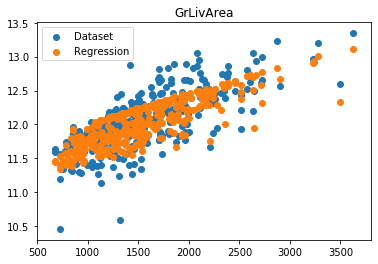

In [398]:
# 可視化

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)

plt.scatter(x_test[:,0], y_test, label='Dataset')
plt.scatter(x_test[:,0], y_test_pred, label='Regression')
plt.legend()
plt.title("GrLivArea")

# グラフを表示する。
plt.show()

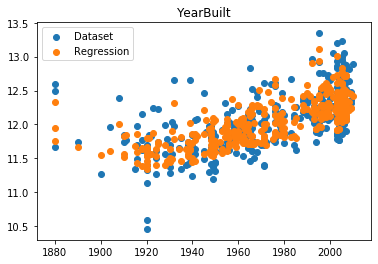

In [362]:
plt.scatter(x_test[:,1], y_test, label='Dataset')
plt.scatter(x_test[:,1], y_test_pred, label='Regression')
plt.legend()
plt.title("YearBuilt")


# グラフを表示する。
plt.show()

プロットしてみたけど、これが良いのか悪いのかはあんまり分からず。

多分そんなに良くはなさそう。

本当は回帰直線を引きたかったがうまく引けなかった。

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


・線形回帰

・SVM

・決定木

・ランダムフォレスト

In [407]:
# 線形回帰

liner = LinearRegression()
liner.fit(x_train, y_train)

y_pred = liner.predict(x_test)
print(y_pred[:5])
y_train_pred = liner.predict(x_train)

outlist = {}

def output(test_pred, train_pred, mod, label, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, outlist={}):
    MSE_train = mean_squared_error(y_train, train_pred)
    MSE_test = mean_squared_error(y_test, test_pred)
    R2_train = mod.score(x_train, y_train)
    R2_test = mod.score(x_test, y_test)
    
    # 学習用、検証用データに関して平均二乗誤差を出力
    print('SVM::MSE Train : %.3f, Test : %.3f' % (MSE_train, MSE_test))
    # 学習用、検証用データに関してR^2を出力
    print('SVM::R^2 Train : %.3f, Test : %.3f' % (R2_train, R2_test))
    
    outlist[label] = [MSE_train, MSE_test, R2_train, R2_test]
    
    return outlist

output(y_pred, y_train_pred, liner, "LINER")

[12.35253918 12.18702646 12.25723185 11.56427535 11.79862404]
SVM::MSE Train : 0.049, Test : 0.046
SVM::R^2 Train : 0.688, Test : 0.728


{'LINER': [0.048552246711697965,
  0.04639927231461719,
  0.6875398688649444,
  0.7277975066028294]}

In [408]:
# SVM

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y_train)

y_svm_pred = regr.predict(x_test)
print(y_svm_pred[:5])
y_svm_train_pred = regr.predict(x_train)

output(y_svm_pred, y_svm_train_pred, regr, "REGR")

[12.50000642 12.21361995 12.16146006 11.52484356 11.80145048]
SVM::MSE Train : 0.037, Test : 0.049
SVM::R^2 Train : 0.765, Test : 0.715


{'LINER': [0.048552246711697965,
  0.04639927231461719,
  0.6875398688649444,
  0.7277975066028294],
 'REGR': [0.03656168603546401,
  0.04865899229246267,
  0.7647056524284932,
  0.7145408027438086]}

In [409]:
# 決定木

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(x_train, y_train)

y_tree_pred = tree.predict(x_test)
print(y_tree_pred[:5])
y_tree_train_pred = tree.predict(x_train)

output(y_tree_pred, y_tree_train_pred, tree, "TREE")

[12.37459184 12.14131128 11.98747579 11.49775837 11.77073249]
SVM::MSE Train : 0.052, Test : 0.063
SVM::R^2 Train : 0.666, Test : 0.632


{'LINER': [0.048552246711697965,
  0.04639927231461719,
  0.6875398688649444,
  0.7277975066028294],
 'REGR': [0.03656168603546401,
  0.04865899229246267,
  0.7647056524284932,
  0.7145408027438086],
 'TREE': [0.05195727299237947,
  0.06274607643330841,
  0.6656266716343884,
  0.6318985707313477]}

In [410]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestRegressor as RFR

rfr = RFR(n_estimators=100)
rfr.fit(x_train, y_train)

y_rfr_pred = rfr.predict(x_test)
print(y_rfr_pred[:5])
y_rfr_train_pred = rfr.predict(x_train)


d = output(y_rfr_pred, y_rfr_train_pred, rfr, "RFR")

tmp = pd.DataFrame(d.values(), index=d.keys(), columns= ["MSE_train", "MSE_test", "R2_train", "R2_test"])

[12.65681899 12.19663364 12.34763378 11.55306118 11.80005903]
SVM::MSE Train : 0.006, Test : 0.053
SVM::R^2 Train : 0.960, Test : 0.692


In [411]:
tmp

,MSE_train,MSE_test,R2_train,R2_test
LINER,0.048552,0.046399,0.687540,0.727798
REGR,0.036562,0.048659,0.764706,0.714541
TREE,0.051957,0.062746,0.665627,0.631899
RFR,0.006159,0.052553,0.960363,0.691695


MSE及びR2の結果をみると、ランダムフォレストのtrainが最も良い結果になっているように見える。

しかし実際のtestでみると線形回帰が最も良い。

